In [ ]:
##find beta 1
#theta = (betaの式)を満たすbetaを求める
#muon
import numpy as np
from scipy.optimize import fsolve

mc2 = 105.66
z = 1
x = 11.82 #測定値
theta = 0.09 #測定値
X0 = 30050



def f(beta):
    return 13.6/mc2 * np.sqrt(1-beta*beta) / beta / beta * z * np.sqrt(x/X0) * (1 + 0.038*np.log(x*z*z/(X0*beta*beta))) - theta


initial_guess = 0.1
beta_ans = fsolve(f, initial_guess)

print("beta:", beta_ans[0])
gamma = 1/np.sqrt(1-beta_ans[0]*beta_ans[0])
print("kinetic energy:", mc2*(gamma - 1))
print("total energy:", gamma*mc2)

beta: 0.1538289482209518
kinetic energy: 1.2727680737529015
total energy: 106.9327680737529


In [ ]:
#find beta 2
#theta = (betaの式)を満たすbetaを求める
#electron
import numpy as np
from scipy.optimize import fsolve

mc2 = 0.511
z = 1
x = 5.91 #測定値
theta = 0.12 #測定値
X0 = 30050



def f(beta):
    return 13.6/mc2 * np.sqrt(1-beta*beta) / beta / beta * z * np.sqrt(x/X0) * (1 + 0.038*np.log(x*z*z/(X0*beta*beta))) - theta


initial_guess = 0.1
beta_ans = fsolve(f, initial_guess)

print("beta:", beta_ans[0])
gamma = 1/np.sqrt(1-beta_ans[0]*beta_ans[0])
print("kinetic energy:", mc2*(gamma - 1))
print("total energy:", gamma*mc2)

beta: 0.917822470933756
kinetic energy: 0.776182596955518
total energy: 1.287182596955518


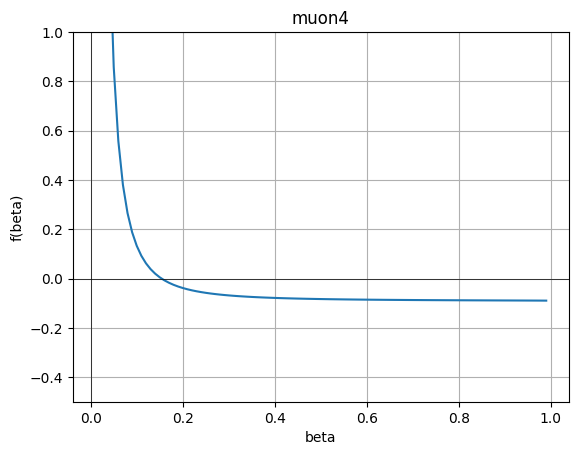

In [ ]:
#find beta 3
#確認用グラフ
import numpy as np
from scipy.optimize import fsolve

mc2 = 105.66 #muon
z = 1
x = 11.82 #測定値
X0 = 30050
theta = 0.09 #測定値


def f(beta):
    return 13.6/mc2 * np.sqrt(1-beta*beta) / beta / beta * z * np.sqrt(x/X0) * (1 + 0.038*np.log(x*z*z/(X0*beta*beta))) - theta

beta = []
fbeta = []

for i in range(1, 100, 1):
    xi = i/100
    yxi = f(xi)
    beta.append(xi)
    fbeta.append(yxi)

import matplotlib.pyplot as plt
plt.plot(beta, fbeta) 
plt.xlabel("beta") 
plt.ylabel("f(beta)")
plt.title("muon4")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.ylim(-0.5, 1)
plt.grid() 
plt.show()


In [ ]:
#Bethe 1
#Bethe-Blochからエネルギー損失計算
#icrrで使ったコード（めっちゃいろいろあやしい）
import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 105.66 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

# 初期エネルギー
Eint = 113.78
E =  Eint # muon energy MeV
Mm = 105.66  # ミューオンの静止質量 (MeV/c²)

# 速度 β の計算
def beta(Energy):
    return np.sqrt(1 - (Mm / (Energy + Mm))**2)

# ベーテ・ブロッホ式 (MeV/(g/cm²))
def stopping_power(Energy):
    b = beta(Energy)
    if b <= 0:
        return np.inf  # 速度がゼロになったらエネルギー損失は無限大
    
    D = 0.307 * Z / A  # ベーテ・ブロッホ公式の定数 (MeV cm²/g)
    B = 2 * me / I  # MeV 単位で統一

    log_arg = B * b**2 / (1 - b**2)
    if log_arg <= 0:
        log_arg = 1e-10  # 負の値を防ぐ
    
    term2 = np.log(log_arg) - b**2
    return D * term2 * rho  # MeV/cm に変換

# 数値積分で厚みを求める
x = 0
dx = 0.001  # 積分ステップ (cm)
for i in range(100000):  # ループ回数を増やす
    x += dx
    de = stopping_power(E) * dx
    E -= de
    if E <= Mm:
        break

# 結果出力
print("平均距離：",1.5*np.pi/2, "cm" )
print("厚み:", x, "cm")
print("最大のエネルギー", Eint-Mm, "MeV")

In [ ]:
#Bethe 2
#Bethe-Blochからエネルギー損失計算
#いろいろ確認用
#たぶん数値とかは全部あってる！
import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 105.66 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

# 初期エネルギー
Eint = 0.589+105.66
E =  Eint # muon energy MeV

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)
print(beta(500))

# ベーテ・ブロッホ式 (MeV/(g/cm²))
def bethe(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b)

#密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

def term1(Energy):
    b = beta(Energy)
    return  K*z*z*Z/A/b/b
print(term1(500))

def term2(Energy):
    b = beta(Energy)
    return  2*mec2*b*b/((1-b*b)*I*I)
print(term2(500))
print(np.log(term2(500)))

def term3(Energy):
    b = beta(Energy)
    return  (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
print(term3(500))

0.977416931304139
0.15844353250547927
18913485608.925438
23.66314102885635
20.90656549891035
飛程： 3.4000000000000017 cm
運動エネルギー 0.5889999999999986 MeV


In [ ]:
#Bethe 3
#Bethe-Blochからエネルギー損失計算
#具体的な計算用
#muon
#計算できてる

import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 105.66 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)
print(beta(500))

# ベーテ・ブロッホ式 (MeV/(g/cm²))
def bethe(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b)

#密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

##########################################################################
# 初期エネルギー
Eint = 1+105.66
E =  Eint # muon energy MeV

# 数値積分でエネルギー損失を求める
x = 0
dx = 0.1  # 積分ステップ (cm)
for i in range(1000000):  # ループ回数を増やす
    x += dx
    de = bethe2(E) * dx
    E -= de
    if E <= Mc2:
        break

# 結果出力
print("飛程：",x, "cm")
print("運動エネルギー", Eint - Mc2, "MeV")

0.977416931304139
飛程： 8.499999999999986 cm
運動エネルギー 1.0 MeV


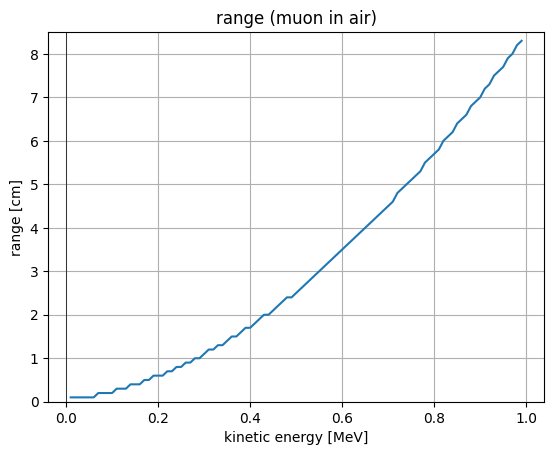

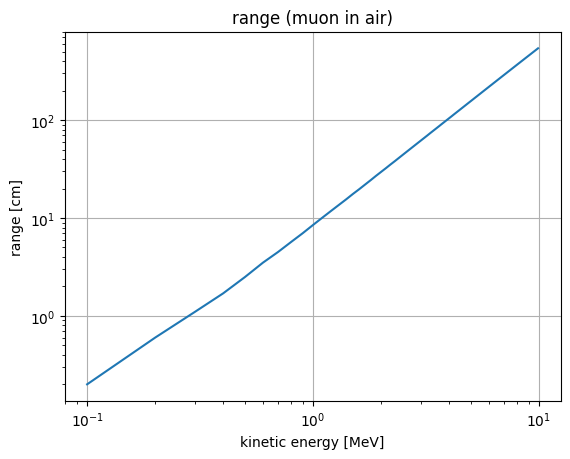

In [ ]:
#Bethe 4
#Bethe-Blochからエネルギー損失計算
#具体的な計算用
#muon
#グラフプロット用

import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 105.66 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)

#BetheBlochに密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

##########################################################################

# 数値積分でエネルギー損失を求める
def stop(Energy):
    x = 0
    dx = 0.1
    for i in range(1000000):
        x += dx
        de = bethe2(Energy) * dx
        Energy -= de
        if Energy <= Mc2+0.002: #ここに0.001とか追加すると変なピークが消える
            break
    return x

x_energy = []
y_length = []

#0.1~1MeVまで0.1刻みで
for i in range(1, 100, 1):
    xi = i/100
    x_energy.append(xi)
    y_length.append(stop(xi+105.66))

import matplotlib.pyplot as plt
plt.plot(x_energy, y_length) 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("range [cm]")
plt.title("range (muon in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.ylim(0, 8.5)
#plt.xscale('log')
#plt.yscale('log')
plt.grid() 
plt.show()



x_energy2 = []
y_length2 = []

#0.1~100MeVまで0.1刻みで
for i in range(1, 100, 1):
    xi = i/10
    x_energy2.append(xi)
    y_length2.append(stop(xi+105.66))

import matplotlib.pyplot as plt
plt.plot(x_energy2, y_length2) 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("range [cm]")
plt.title("range (muon in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
#plt.ylim(0, 8.5)
plt.xscale('log')
plt.yscale('log')
plt.grid() 
plt.show()

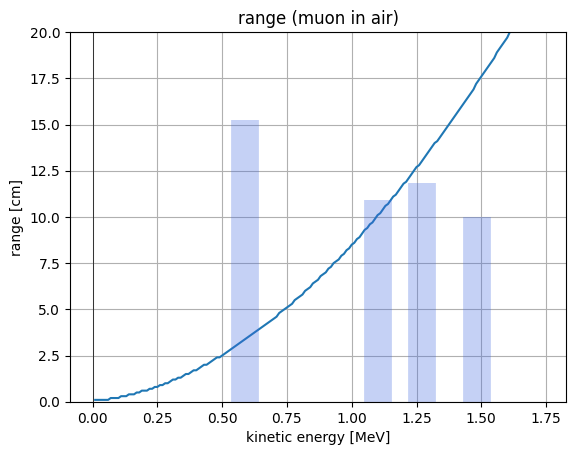

In [ ]:
#Bethe 5
#Bethe-Blochからエネルギー損失計算
#具体的な計算用
#muon
#グラフプロット用
#飛程がどれくらいか見る用

import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 105.66 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)

#BetheBlochに密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

##########################################################################

# 数値積分でエネルギー損失を求める
def stop(Energy):
    x = 0
    dx = 0.1
    for i in range(1000000):
        x += dx
        de = bethe2(Energy) * dx
        Energy -= de
        if Energy <= Mc2+0.002: #ここに0.001とか追加すると変なピークが消える
            break
    return x

x_energy = []
y_length = []

#0.1~1MeVまで0.1刻みで
for i in range(1, 175, 1):
    xi = i/100
    x_energy.append(xi)
    y_length.append(stop(xi+105.66))

import matplotlib.pyplot as plt
plt.plot(x_energy, y_length) 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("range [cm]")
plt.title("range (muon in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.ylim(0, 20)
plt.vlines(x=0.589, ymin=0, ymax=15.23, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
#plt.vlines(x=55.741, ymin=0, ymax=10.68, color='royalblue', linestyle='-', linewidth=10, alpha=0.3)
plt.vlines(x=1.485, ymin=0, ymax=10.00, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
plt.vlines(x=1.273, ymin=0, ymax=11.82, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
plt.vlines(x=1.103, ymin=0, ymax=10.91, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
#plt.xscale('log')
#plt.yscale('log')
plt.grid() 
plt.show()

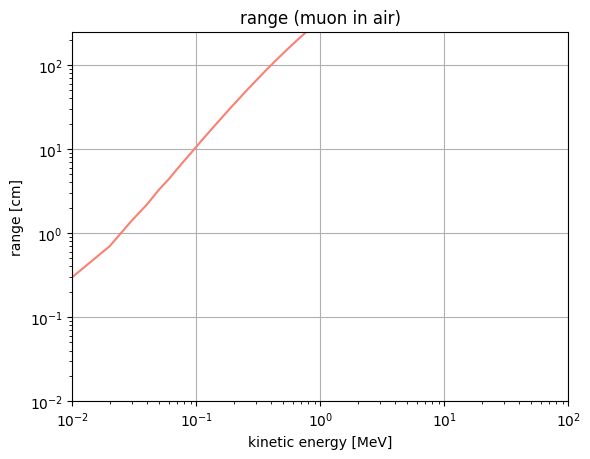

In [ ]:
#Bethe 6
#Bethe-Blochからエネルギー損失計算
#具体的な計算用
#electron、霧箱のプリントとスケール合わせたもの
#グラフプロット用
#飛程がどれくらいか見る用

import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 0.511 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)

#BetheBlochに密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

##########################################################################

# 数値積分でエネルギー損失を求める
def stop(Energy):
    x = 0
    dx = 0.1
    for i in range(1000000):
        x += dx
        de = bethe2(Energy) * dx
        Energy -= de
        if Energy <= Mc2+0.002: #ここに0.001とか追加すると変なピークが消える
            break
    return x

x_energy = []
y_length = []

#0.01~1MeVまで0.01刻みで
for i in range(1, 200, 1):
    xi = i/100
    x_energy.append(xi)
    y_length.append(stop(xi+0.511))

import matplotlib.pyplot as plt
plt.plot(x_energy, y_length, color = "salmon") 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("range [cm]")
plt.title("range (muon in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.01, 100)
plt.ylim(0.01, 250)
#plt.vlines(x=0.589, ymin=0, ymax=15.23, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
#plt.vlines(x=55.741, ymin=0, ymax=10.68, color='royalblue', linestyle='-', linewidth=10, alpha=0.3)
#plt.vlines(x=1.485, ymin=0, ymax=10.00, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
#plt.vlines(x=1.273, ymin=0, ymax=11.82, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
#plt.vlines(x=1.103, ymin=0, ymax=10.91, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.grid() 
plt.show()

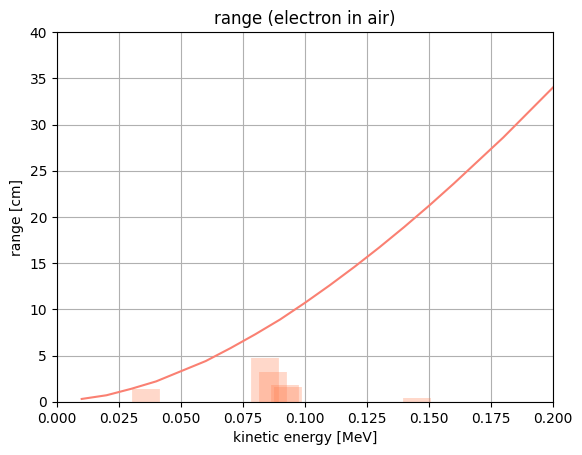

In [ ]:
#Bethe 7
#Bethe-Blochからエネルギー損失計算
#具体的な計算用
#electron、飛程比較用
#グラフプロット用
#飛程がどれくらいか見る用

import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 0.511 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)

#BetheBlochに密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

##########################################################################

# 数値積分でエネルギー損失を求める
def stop(Energy):
    x = 0
    dx = 0.1
    for i in range(1000000):
        x += dx
        de = bethe2(Energy) * dx
        Energy -= de
        if Energy <= Mc2+0.002: #ここに0.001とか追加すると変なピークが消える
            break
    return x

x_energy = []
y_length = []

#0.01~1MeVまで0.01刻みで
for i in range(1, 100, 1):
    xi = i/100
    x_energy.append(xi)
    y_length.append(stop(xi+0.511))

import matplotlib.pyplot as plt
plt.plot(x_energy, y_length, color = "salmon") 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("range [cm]")
plt.title("range (electron in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0, 0.2)
plt.ylim(0, 40)
plt.vlines(x=0.093, ymin=0, ymax=1.59, color='coral', linestyle='-', linewidth=20, alpha=0.3)
plt.vlines(x=0.754, ymin=0, ymax=3.41, color='coral', linestyle='-', linewidth=10, alpha=0.3)
plt.vlines(x=0.087, ymin=0, ymax=3.18, color='coral', linestyle='-', linewidth=20, alpha=0.3)
plt.vlines(x=0.036, ymin=0, ymax=1.36, color='coral', linestyle='-', linewidth=20, alpha=0.3)
plt.vlines(x=0.145, ymin=0, ymax=0.45, color='coral', linestyle='-', linewidth=20, alpha=0.3)
plt.vlines(x=0.084, ymin=0, ymax=4.77, color='coral', linestyle='-', linewidth=20, alpha=0.3)
plt.vlines(x=0.280, ymin=0, ymax=1.14, color='coral', linestyle='-', linewidth=10, alpha=0.3)
plt.vlines(x=0.092, ymin=0, ymax=1.82, color='coral', linestyle='-', linewidth=20, alpha=0.3)
plt.vlines(x=0.522, ymin=0, ymax=2.27, color='coral', linestyle='-', linewidth=20, alpha=0.3)
plt.vlines(x=0.776, ymin=0, ymax=2.05, color='coral', linestyle='-', linewidth=20, alpha=0.3)
#plt.xscale('log')
#plt.yscale('log')
plt.grid() 
plt.show()

0.977416931304139


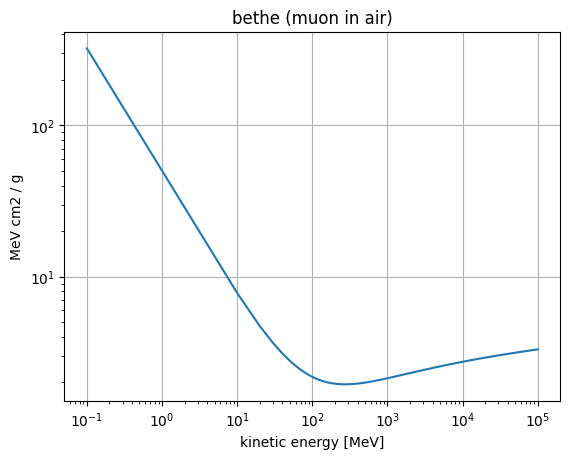

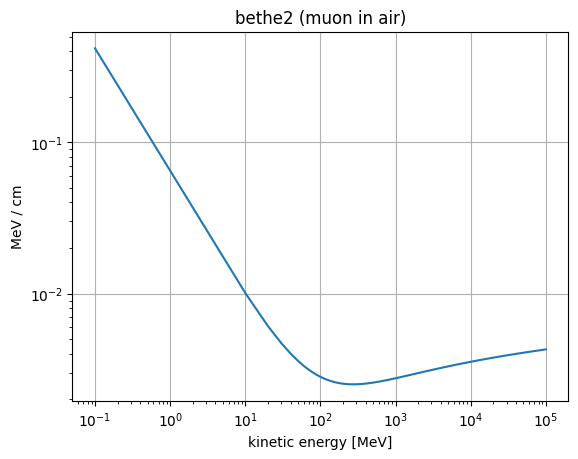

In [ ]:
#Bethe 8
#Bethe-Blochのプロット
#muon
import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 105.66 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

# 初期エネルギー
Eint = 500
E =  Eint # muon energy MeV

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)
print(beta(500))

# ベーテ・ブロッホ式 (MeV/(g/cm²))
def bethe(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b)

#密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

x_energy = np.linspace(0.1, 100000, 10000)
y_bethe = bethe(x_energy+105.66)
y_bethe2 = bethe2(x_energy+105.66)

import matplotlib.pyplot as plt
plt.plot(x_energy, y_bethe) 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("MeV cm2 / g")
plt.title("bethe (muon in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
#plt.ylim(-0.5, 1)
plt.xscale('log')
plt.yscale('log')
plt.grid() 
plt.show()

plt.plot(x_energy, y_bethe2) 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("MeV / cm")
plt.title("bethe2 (muon in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
#plt.ylim(-0.5, 1)
plt.xscale('log')
plt.yscale('log')
plt.grid() 
plt.show()


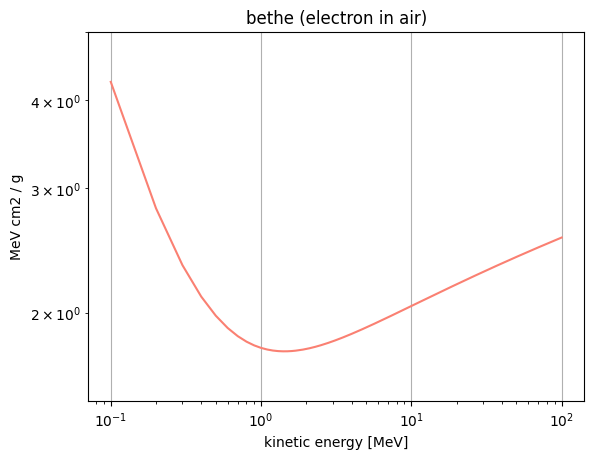

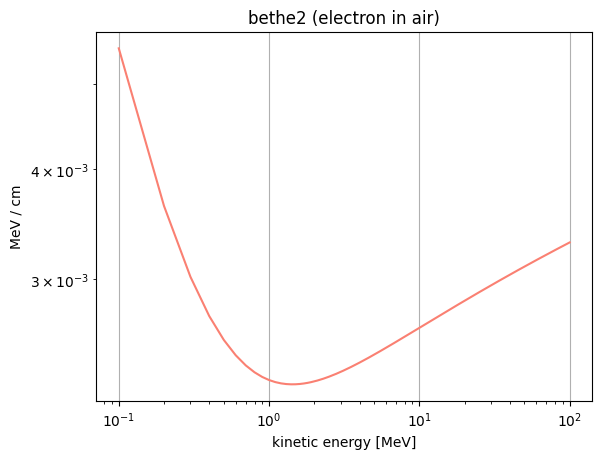

In [ ]:
#Bethe 9
#Bethe-Blochのプロット
#electron
import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 0.511 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

# 初期エネルギー
Eint = 10
E =  Eint # muon energy MeV

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)

# ベーテ・ブロッホ式 (MeV/(g/cm²))
def bethe(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b)

#密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

x_energy = np.linspace(0.1, 100, 1000)
y_bethe = bethe(x_energy+0.511)
y_bethe2 = bethe2(x_energy+0.511)

import matplotlib.pyplot as plt
plt.plot(x_energy, y_bethe, color='salmon') 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("MeV cm2 / g")
plt.title("bethe (electron in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.ylim(1.5, 5)
plt.xscale('log')
plt.yscale('log')
plt.grid() 
plt.show()

plt.plot(x_energy, y_bethe2, color='salmon') 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("MeV / cm")
plt.title("bethe2 (electron in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
#plt.ylim(-0.5, 1)
plt.xscale('log')
plt.yscale('log')
plt.grid() 
plt.show()
